# COURSE:   PGP [AI&ML]

## Learner :  Chaitanya Kumar Battula
## Module  : Machine Learning
## Topic   :  Horse Survival

In [22]:
# import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [23]:
animals = pd.read_csv('horse.csv')
animals.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [24]:
animals.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2',
       'lesion_3', 'cp_data'],
      dtype='object')

In [25]:
target = animals['outcome']
type(target)


pandas.core.series.Series

In [26]:
target.unique()


array(['died', 'euthanized', 'lived'], dtype=object)

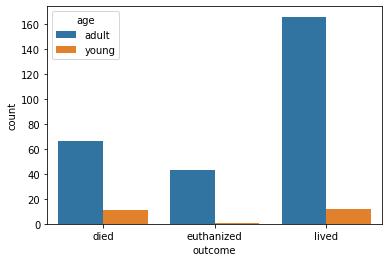

In [27]:
sns.countplot(x='outcome',data=animals,hue='age')

In [28]:
animals = animals.drop(['outcome'], axis=1)

In [29]:
animals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

In [30]:
# # Building a code to filter all features that are object type
# categorical =[]
# for column in columns:
#     print(column)
#     #print(animals[column].dtype)
#     #if(animals[column].dtype=='object'):
#         #print(animals[column].dtype)
#         #categorical.append(column)

In [31]:
# Filter all the columns that are categorical
columns = animals.columns

categorical =[]
for column in columns:
    if(animals[column].dtype=='object'):
        categorical.append(column)

category_variables =categorical 
category_variables

['surgery',
 'age',
 'temp_of_extremities',
 'peripheral_pulse',
 'mucous_membrane',
 'capillary_refill_time',
 'pain',
 'peristalsis',
 'abdominal_distention',
 'nasogastric_tube',
 'nasogastric_reflux',
 'rectal_exam_feces',
 'abdomen',
 'abdomo_appearance',
 'surgical_lesion',
 'cp_data']

In [32]:
for category in category_variables:
    animals[category] = pd.get_dummies(animals[category])
    
animals.head()


,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,1,1,530101,38.5,66.0,28.0,0,0,0,0,...,1,45.0,8.4,0,NaN,1,11300,0,0,1
1,0,1,534817,39.2,88.0,20.0,0,0,0,0,...,0,50.0,85.0,0,2.0,1,2208,0,0,1
2,1,1,530334,38.3,40.0,24.0,0,0,0,0,...,0,33.0,6.7,0,NaN,1,0,0,0,0
3,0,0,5290409,39.1,164.0,84.0,1,0,0,0,...,0,48.0,7.2,0,5.3,0,2208,0,0,0
4,1,1,530255,37.3,104.0,35.0,0,0,0,0,...,0,74.0,7.4,0,NaN,1,4300,0,0,1


In [33]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

X,y = animals.values, target.values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)
X_train.shape

(239, 27)

In [34]:
y_train.shape

(239,)

In [35]:
X_test.shape

(60, 27)

In [36]:
y_test.shape

(60,)

In [37]:
# from sklearn.impute import Imputer  , will not work
import numpy as np
from sklearn.impute import SimpleImputer 
imp = SimpleImputer(missing_values=np.nan, strategy = "most_frequent")

X_train = imp.fit_transform(X_train)
X_test  = imp.fit_transform(X_test)


# Decission tree Classfier

In [38]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_predict, y_test)
accuracy

0.5833333333333334

In [41]:
text_representation = tree.export_text(classifier)
print(text_representation)

|--- feature_23 <= 150.00
|   |--- feature_15 <= 6.35
|   |   |--- class: 2
|   |--- feature_15 >  6.35
|   |   |--- class: 0
|--- feature_23 >  150.00
|   |--- feature_19 <= 9.05
|   |   |--- feature_23 <= 3164.50
|   |   |   |--- feature_23 <= 3068.00
|   |   |   |   |--- feature_2 <= 5269976.00
|   |   |   |   |   |--- feature_0 <= 0.50
|   |   |   |   |   |   |--- feature_19 <= 5.95
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_19 >  5.95
|   |   |   |   |   |   |   |--- feature_16 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_2 <= 530387.50
|   |   |   |   |   |   |   |   |   |--- feature_2 <= 528083.50
|   |   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |   |--- feature_2 >  528083.50
|   |   |   |   |   |   |   |   |   |   |--- feature_23 <= 2164.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- feature_23 >  2164.50
|   |   |   |  

In [ ]:
# saving result to a file

with open("decistion_tree.log", "w") as fout:
    fout.write(Horse_Survival)

# random forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_predict, y_test)
accuracy